In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Sample - Superstore.xls")

### Exercise 8: Missing values in Pandas

In [3]:
df_missing=pd.read_excel("Sample - Superstore.xls",sheet_name="Missing")

In [4]:
df_missing

Customer      Product     Sales  Quantity  Discount   Profit
0      Brosina Hoffman          NaN  1706.184       9.0       0.2  85.3092
1      Brosina Hoffman       Phones   911.424       4.0       0.2  68.3568
2   Zuschuss Donatelli          Art     8.560       2.0       0.0   2.4824
3   Zuschuss Donatelli       Phones       NaN       3.0       0.2  16.0110
4   Zuschuss Donatelli      Binders    22.720       4.0       0.2   7.3840
5        Eric Hoffmann      Binders    11.648       NaN       0.2   4.2224
6        Eric Hoffmann  Accessories    90.570       3.0       0.0  11.7741
7         Ruben Ausman          NaN    77.880       2.0       0.0      NaN
8                  NaN  Accessories    13.980       2.0       0.0   6.1512
9         Kunst Miller      Binders    25.824       6.0       0.2   9.3612
10        Kunst Miller        Paper   146.730       3.0       0.0  68.9631

In [5]:
df_missing.isnull()

Customer  Product  Sales  Quantity  Discount  Profit
0      False     True  False     False     False   False
1      False    False  False     False     False   False
2      False    False  False     False     False   False
3      False    False   True     False     False   False
4      False    False  False     False     False   False
5      False    False  False      True     False   False
6      False    False  False     False     False   False
7      False     True  False     False     False    True
8       True    False  False     False     False   False
9      False    False  False     False     False   False
10     False    False  False     False     False   False

In [6]:
df_missing.isnull().sum()

Customer    1
Product     2
Sales       1
Quantity    1
Discount    0
Profit      1
dtype: int64

In [7]:
df_missing.isnull().any(axis=0)

Customer     True
Product      True
Sales        True
Quantity     True
Discount    False
Profit       True
dtype: bool

In [8]:
df_missing.isnull().any(axis=1)

0      True
1     False
2     False
3      True
4     False
5      True
6     False
7      True
8      True
9     False
10    False
dtype: bool

In [9]:
df_missing[df_missing.isnull().any(axis=1)]

Customer      Product     Sales  Quantity  Discount   Profit
0     Brosina Hoffman          NaN  1706.184       9.0       0.2  85.3092
3  Zuschuss Donatelli       Phones       NaN       3.0       0.2  16.0110
5       Eric Hoffmann      Binders    11.648       NaN       0.2   4.2224
7        Ruben Ausman          NaN    77.880       2.0       0.0      NaN
8                 NaN  Accessories    13.980       2.0       0.0   6.1512

In [10]:
df_missing[df_missing.isnull().all(axis=1)]   # Empty, each row had at least 1 NaN

Empty DataFrame
Columns: [Customer, Product, Sales, Quantity, Discount, Profit]
Index: []

### Filling missing values with `fillna()`

In [11]:
df_missing.fillna('FILL')

Customer      Product    Sales Quantity  Discount   Profit
0      Brosina Hoffman         FILL  1706.18        9       0.2  85.3092
1      Brosina Hoffman       Phones  911.424        4       0.2  68.3568
2   Zuschuss Donatelli          Art     8.56        2       0.0   2.4824
3   Zuschuss Donatelli       Phones     FILL        3       0.2   16.011
4   Zuschuss Donatelli      Binders    22.72        4       0.2    7.384
5        Eric Hoffmann      Binders   11.648     FILL       0.2   4.2224
6        Eric Hoffmann  Accessories    90.57        3       0.0  11.7741
7         Ruben Ausman         FILL    77.88        2       0.0     FILL
8                 FILL  Accessories    13.98        2       0.0   6.1512
9         Kunst Miller      Binders   25.824        6       0.2   9.3612
10        Kunst Miller        Paper   146.73        3       0.0  68.9631

In [12]:
df_missing[['Customer','Product']].fillna('FILL')

Customer      Product
0      Brosina Hoffman         FILL
1      Brosina Hoffman       Phones
2   Zuschuss Donatelli          Art
3   Zuschuss Donatelli       Phones
4   Zuschuss Donatelli      Binders
5        Eric Hoffmann      Binders
6        Eric Hoffmann  Accessories
7         Ruben Ausman         FILL
8                 FILL  Accessories
9         Kunst Miller      Binders
10        Kunst Miller        Paper

In [13]:
df_missing['Sales'].fillna(method='ffill')

0     1706.184
1      911.424
2        8.560
3        8.560
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

In [14]:
df_missing['Sales'].fillna(method='bfill')

0     1706.184
1      911.424
2        8.560
3       22.720
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

In [15]:
df_missing['Sales'].fillna(df_missing.mean()['Sales'])

0     1706.184
1      911.424
2        8.560
3      301.552
4       22.720
5       11.648
6       90.570
7       77.880
8       13.980
9       25.824
10     146.730
Name: Sales, dtype: float64

### Dropping missing values with `dropna()`

In [16]:
df_missing.dropna(axis=0)

Customer      Product    Sales  Quantity  Discount   Profit
1      Brosina Hoffman       Phones  911.424       4.0       0.2  68.3568
2   Zuschuss Donatelli          Art    8.560       2.0       0.0   2.4824
4   Zuschuss Donatelli      Binders   22.720       4.0       0.2   7.3840
6        Eric Hoffmann  Accessories   90.570       3.0       0.0  11.7741
9         Kunst Miller      Binders   25.824       6.0       0.2   9.3612
10        Kunst Miller        Paper  146.730       3.0       0.0  68.9631

In [17]:
df_missing.dropna(axis=1)

Discount
0        0.2
1        0.2
2        0.0
3        0.2
4        0.2
5        0.2
6        0.0
7        0.0
8        0.0
9        0.2
10       0.0

In [18]:
df_missing.dropna(axis=1,thresh=10)

Customer     Sales  Quantity  Discount   Profit
0      Brosina Hoffman  1706.184       9.0       0.2  85.3092
1      Brosina Hoffman   911.424       4.0       0.2  68.3568
2   Zuschuss Donatelli     8.560       2.0       0.0   2.4824
3   Zuschuss Donatelli       NaN       3.0       0.2  16.0110
4   Zuschuss Donatelli    22.720       4.0       0.2   7.3840
5        Eric Hoffmann    11.648       NaN       0.2   4.2224
6        Eric Hoffmann    90.570       3.0       0.0  11.7741
7         Ruben Ausman    77.880       2.0       0.0      NaN
8                  NaN    13.980       2.0       0.0   6.1512
9         Kunst Miller    25.824       6.0       0.2   9.3612
10        Kunst Miller   146.730       3.0       0.0  68.9631

###  Outlier detection using simple statistical test

In [19]:
df_sample = df[['Customer Name','State','Sales','Profit']].sample(n=50).copy()

In [20]:
df_sample.iloc[5] # Row number 5 

Customer Name     Evan Bailliet
State            North Carolina
Sales                      5.04
Profit                    1.764
Name: 7877, dtype: object

In [21]:
df_sample.iloc[15] # Row number 15 

Customer Name    William Brown
State               California
Sales                    11.68
Profit                  3.0368
Name: 4709, dtype: object

In [22]:
df_sample.iloc[[5, 15]] # Rows number 5 and 15

Customer Name           State  Sales  Profit
7877  Evan Bailliet  North Carolina   5.04  1.7640
4709  William Brown      California  11.68  3.0368

In [23]:
# Assign a wrong (negative value) in few places
df_sample['Sales'].iloc[5]=-1000.0
df_sample['Sales'].iloc[15]=-500.0

c:\Users\student\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


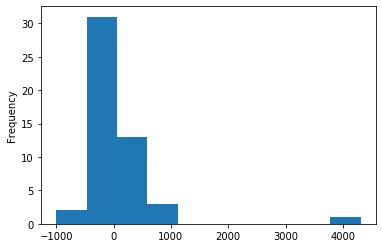

In [24]:
# Check distribution
df_sample['Sales'].plot.hist()

In [25]:
df_sample['Profit'].plot.hist()

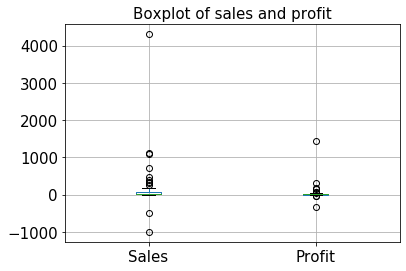

In [26]:
df_sample.plot.box()
plt.title("Boxplot of sales and profit", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

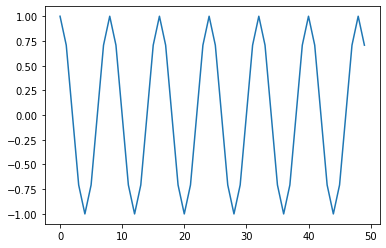

In [40]:
from math import cos, pi
ys = [cos(i*(pi/4)) for i in range(50)]
plt.plot(ys)

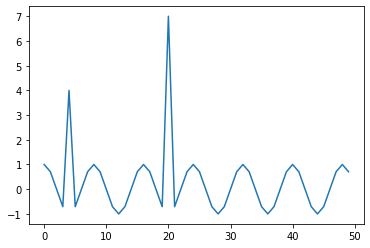

In [28]:
ys[4] = ys[4] + 5.0
ys[20] = ys[20] + 8.0
plt.plot(ys)

### (Box plot)

{'whiskers': [<matplotlib.lines.Line2D at 0x104b7410>,
 'caps': [<matplotlib.lines.Line2D at 0x104b79f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x104b73f0>],
 'medians': [<matplotlib.lines.Line2D at 0x104b7eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x104c13b0>],
 'means': []}

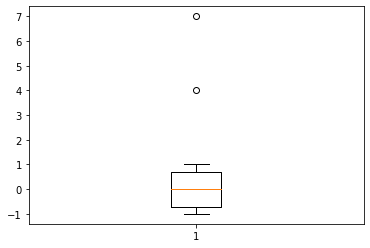

In [29]:
plt.boxplot(ys)

###  (Z score)

In [30]:
from scipy import stats
cos_arr_z_score = stats.zscore(ys)

In [31]:
cos_arr_z_score

array([ 0.54401794,  0.31827963, -0.22670088, -0.77168139,  2.85617442,
       -0.77168139, -0.22670088,  0.31827963,  0.54401794,  0.31827963,
       -0.22670088, -0.77168139, -0.99741971, -0.77168139, -0.22670088,
        0.31827963,  0.54401794,  0.31827963, -0.22670088, -0.77168139,
        5.1683309 , -0.77168139, -0.22670088,  0.31827963,  0.54401794,
        0.31827963, -0.22670088, -0.77168139, -0.99741971, -0.77168139,
       -0.22670088,  0.31827963,  0.54401794,  0.31827963, -0.22670088,
       -0.77168139, -0.99741971, -0.77168139, -0.22670088,  0.31827963,
        0.54401794,  0.31827963, -0.22670088, -0.77168139, -0.99741971,
       -0.77168139, -0.22670088,  0.31827963,  0.54401794,  0.31827963])

In [32]:
import pandas as pd
df_original = pd.DataFrame(ys)
df_original

0
0   1.000000e+00
1   7.071068e-01
2   6.123234e-17
3  -7.071068e-01
4   4.000000e+00
5  -7.071068e-01
6  -1.836970e-16
7   7.071068e-01
8   1.000000e+00
9   7.071068e-01
10  3.061617e-16
11 -7.071068e-01
12 -1.000000e+00
13 -7.071068e-01
14 -4.286264e-16
15  7.071068e-01
16  1.000000e+00
17  7.071068e-01
18  5.510911e-16
19 -7.071068e-01
20  7.000000e+00
21 -7.071068e-01
22 -2.449913e-15
23  7.071068e-01
24  1.000000e+00
25  7.071068e-01
26 -9.803364e-16
27 -7.071068e-01
28 -1.000000e+00
29 -7.071068e-01
30 -2.694842e-15
31  7.071068e-01
32  1.000000e+00
33  7.071068e-01
34 -7.354071e-16
35 -7.071068e-01
36 -1.000000e+00
37 -7.071068e-01
38 -2.939771e-15
39  7.071068e-01
40  1.000000e+00
41  7.071068e-01
42 -4.904777e-16
43 -7.071068e-01
44 -1.000000e+00
45 -7.071068e-01
46 -3.184701e-15
47  7.071068e-01
48  1.000000e+00
49  7.071068e-01

###  Removing outliers based on Z score.

In [33]:
cos_arr_without_outliers = df_original[(cos_arr_z_score < 3)]

In [34]:
cos_arr_without_outliers.shape

(49, 1)

In [35]:
df_original.shape

(50, 1)

In [36]:
plt.plot(cos_arr_without_outliers)

### As you can see, only one of the outliers was removed base on the Z score.  Can yo modify the filtering so that both are removed?